# **THE SPARK FOUNDATION**
### Data Science and Business Analytics Intern

#### **Name: Rohan Hasabe**

TASK : Predicton using Desision Tree and EDA

DATASET : Iris Dataset

LANGUAGE : Python

## Decision Tree Classifier
#### *Decision Tree Classifier is a non-parametric supervised learning method used for classification and regression. A tree can be seen as a piecewise constant approximation.*

## Iris Dataset
##### This Dataset consists of 4 attributes SepalLength, SepalWidth, PetalLength, PetalWidth with the information extracted from the Model will classify Iris Specis as Iris-setosa,Iris-versicolor or Iris-virginica.


Importing required libraries and Dataset.

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import tree


In [251]:
#setting the size of the figures using matplotlib
plt.rcParams['figure.figsize'] = (10.0, 7.5)

In [252]:
iris_data = pd.read_csv('Iris.csv')

### Data Exploration

In [253]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [254]:
iris_data.drop(["Id"],axis=1,inplace=True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [255]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [256]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [257]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since there is no null value in any attribute, Let's proceed with Visualizations

### Visualizations 

C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

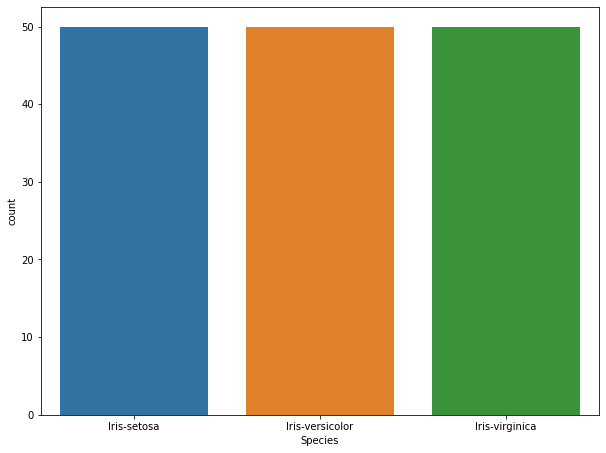

In [258]:


sns.countplot(iris_data['Species'])


In [259]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

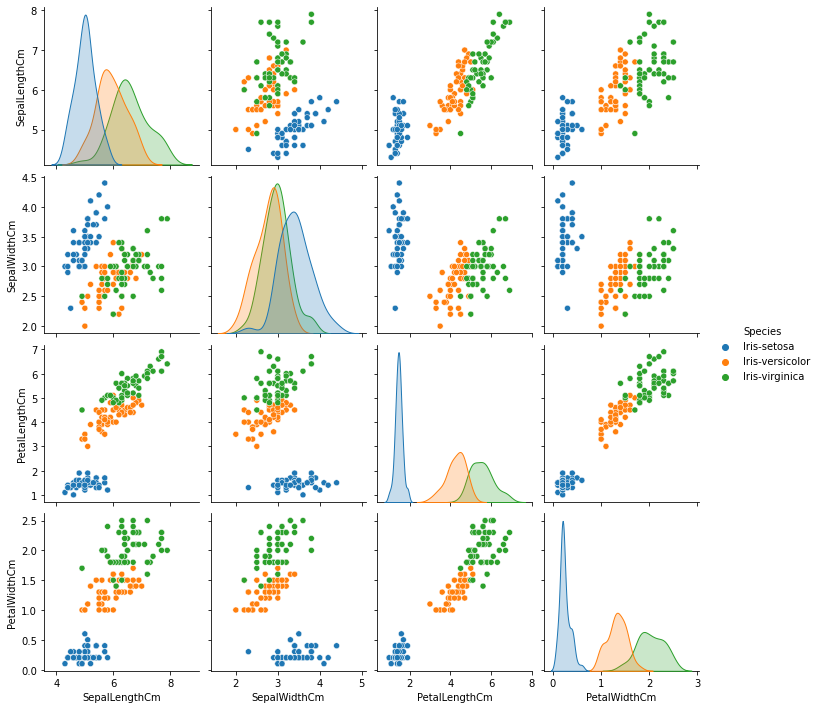

In [260]:
sns.pairplot(iris_data,hue='Species')

The distribution of each attributes in their range

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

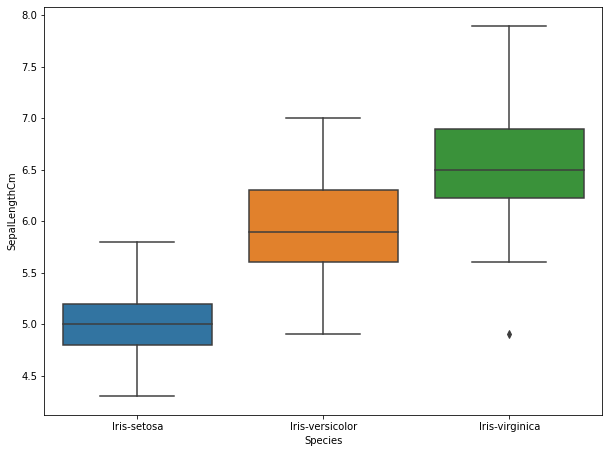

In [261]:
sns.boxplot(x='Species', y='SepalLengthCm',data=iris_data)

Observation: Setosa have smallest Sepal Length and Virginica have largest Sepal Length

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

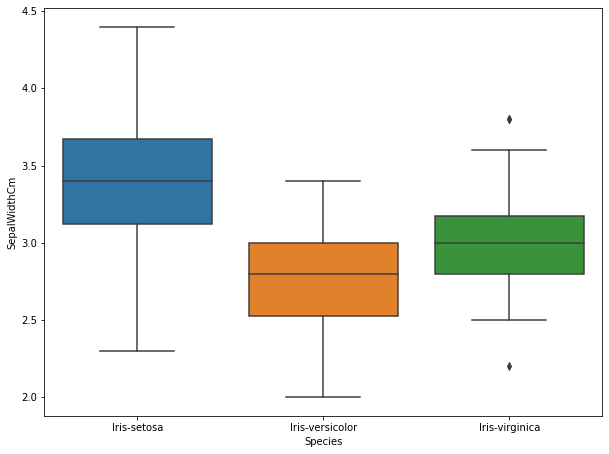

In [262]:
sns.boxplot(x='Species', y='SepalWidthCm',data=iris_data)

Observation: Setosa seems to have most spread in Sepal Width than other species

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

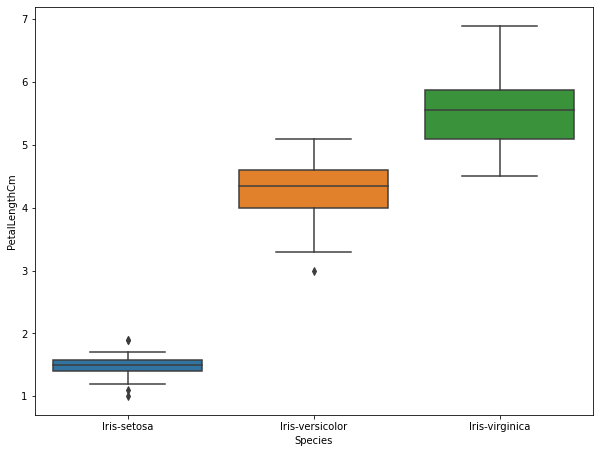

In [263]:
sns.boxplot(x='Species', y='PetalLengthCm',data=iris_data)

Observation: Setosa has smallest Petal length and Virginica has largest Petal length

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

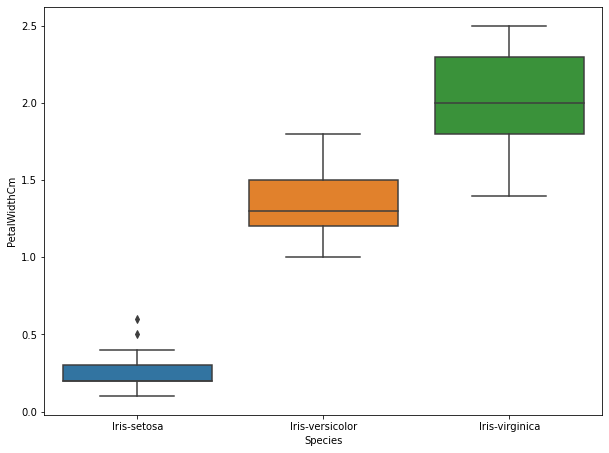

In [264]:
sns.boxplot(x='Species', y='PetalWidthCm',data=iris_data)

Observation: Setosa has smallest Petal width and Virginica has largest Petal width


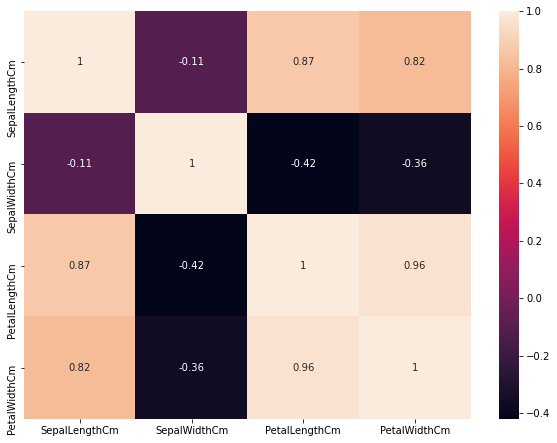

In [265]:
sns.heatmap(iris_data.corr(), annot=True)
plt.show()

#### **Feature Selection and Splitting between Training and Test Set**

In [266]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [267]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris_data[features]
y = iris_data.Species

In [268]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [269]:
y


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [270]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

#### **Decision Tree**

In [271]:
DTCmodel=DecisionTreeClassifier(random_state=1)

In [272]:
DTCmodel.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

**Testing Decision Tree model**

In [273]:
predictedDTC = DTCmodel.predict(X_test)
pd.DataFrame([predictedDTC, y_test]).T.head(10)

,0,1
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica



**Check the accuracy of predictions**

In [274]:
print(accuracy_score(predictedDTC, y_test)*100)

97.36842105263158



**Constructing Confusion Matrix**

In [275]:
confusion_matrix(y_test,predictedDTC)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

### Model has 97% for test data

### **Decision Tree Visulization**

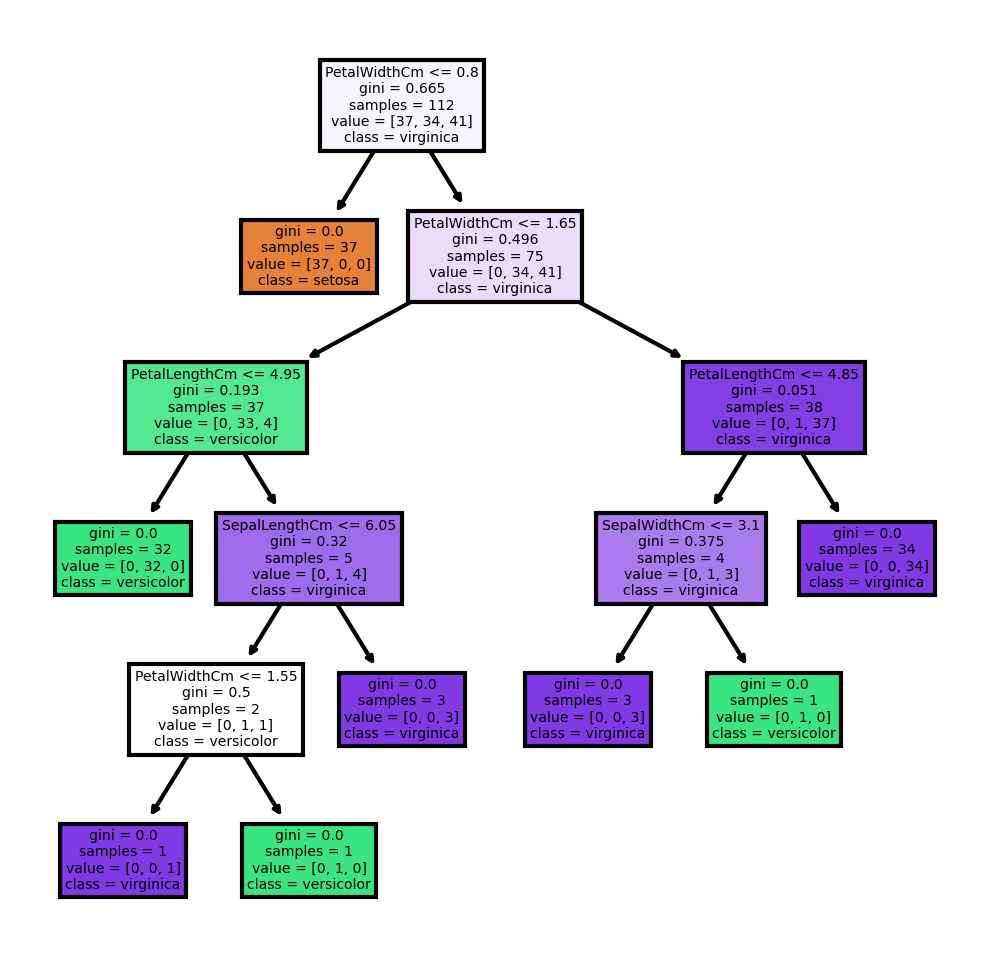

In [276]:
names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes=['setosa','versicolor','virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(DTCmodel,feature_names=names,class_names=classes,filled= True);